In [1]:
import requests
import pandas as pd

file_url = 'https://raw.githubusercontent.com/ani-exe/simple_ao3_scraper/main/outfile.json'
data = requests.get(file_url).json()
data = data['data']
df = pd.DataFrame(data)
df.dtypes

title               object
author              object
isAnon                bool
isOrphan              bool
id                  object
rating              object
warnings            object
category            object
isWip                 bool
lastUpdated         object
relationships       object
isSlash               bool
freeforms           object
summary             object
isSeries              bool
seriesMeta          object
language            object
words                int64
currentChapters      int64
intendedChapters    object
kudos                int64
hits                 int64
comments             int64
bookmarks            int64
collections          int64
dtype: object

In [2]:
# kudos / hits can be useful for another view (altho favors newer works & oneshots)
# versus overall stats which favors multichap & older
# wonder what the balance would be here.

df = df.assign(kudos_per_hits = df.kudos / df.hits)
df['lastUpdated'] = pd.to_datetime(df['lastUpdated'])
df['rating'] = df['rating'].str[:1]

df = df.assign(numSeries = df['seriesMeta'].str.len())
df

,title,author,isAnon,isOrphan,id,rating,warnings,category,isWip,lastUpdated,...,words,currentChapters,intendedChapters,kudos,hits,comments,bookmarks,collections,kudos_per_hits,numSeries
0,Trust,mikanviola,False,False,/works/47233843,T,[No Archive Warnings Apply],[M/M],False,2023-05-17,...,2863,2,2,4,14,1,0,0,0.285714,0
1,At The End of Everything (Hold Onto Anything),FixhBones (Fish_Bones),False,False,/works/47236459,T,[No Archive Warnings Apply],"[Gen, M/M]",False,2023-05-17,...,1771,1,1,9,37,0,1,0,0.243243,0
2,Warmth Is in the Empty Spaces of the Heart,calfhooves,False,False,/works/47235577,T,[No Archive Warnings Apply],[M/M],False,2023-05-17,...,2412,1,1,9,42,3,1,0,0.214286,0
3,Tabata,metukika,False,False,/works/46992460,G,[No Archive Warnings Apply],[M/M],False,2023-05-17,...,13774,3,3,83,708,38,10,0,0.117232,0
4,New Business Venture,blue_avocado,False,False,/works/18739756,T,[No Archive Warnings Apply],[Gen],True,2023-05-17,...,44304,9,?,23,320,10,2,0,0.071875,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7059,Double Team Tactic,orphan_account,False,True,/works/5782909,M,[Underage],[M/M],False,2016-01-22,...,5281,1,1,792,12710,41,62,0,0.062313,0
7060,1,slutreigen (pleasejustno),False,False,/works/5613691,G,[No Archive Warnings Apply],[No category],False,2016-01-02,...,356,1,1,204,2221,15,5,0,0.091851,1
7061,Brother's Keeper,allthingsunrelated,False,False,/works/5239292,N,[Choose Not To Use Archive Warnings],[Gen],False,2015-11-18,...,1722,1,1,251,1931,7,43,0,0.129984,0
7062,senses,ekubo (apurochi),False,False,/works/2535437,T,[Underage],[M/M],False,2014-10-30,...,266,1,1,172,2786,5,5,1,0.061737,0


In [3]:
df.describe()

,words,currentChapters,kudos,hits,comments,bookmarks,collections,kudos_per_hits,numSeries
count,7.064000e+03,7064.000000,7064.000000,7064.000000,7064.000000,7064.000000,7064.000000,7064.000000,7064.000000
mean,6.590518e+03,2.178228,207.103907,2182.405011,22.996319,23.256370,0.071631,0.110478,0.208805
std,6.790334e+04,13.022827,395.214921,6097.343447,102.285764,70.852027,0.299548,0.050869,0.416462
min,1.000000e+02,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.148500e+03,1.000000,47.000000,487.000000,4.000000,3.000000,0.000000,0.071931,0.000000
50%,2.269000e+03,1.000000,109.000000,1065.000000,8.000000,8.000000,0.000000,0.105413,0.000000
75%,4.940500e+03,1.000000,225.250000,2236.000000,18.000000,21.000000,0.000000,0.142618,0.000000
max,5.440995e+06,1056.000000,12500.000000,386291.000000,5886.000000,2703.000000,8.000000,0.475000,2.000000


In [4]:
numeric_stats = ["words", "kudos", "hits", "comments", "bookmarks", "kudos_per_hits"]
rating_per_avg_stat = df[["rating"] + numeric_stats].groupby("rating").mean()
rating_per_avg_stat

,words,kudos,hits,comments,bookmarks,kudos_per_hits
rating,,,,,,
E,6350.334331,208.994012,3477.519960,17.473054,18.754491,0.061050
G,2846.772744,206.848496,1632.233780,15.143530,22.006887,0.134563
M,21211.071685,182.157706,2335.211470,38.611111,20.508961,0.084211
N,3700.894958,125.886555,1190.884454,10.897059,11.903361,0.107240
T,8259.468488,229.752755,2449.886294,33.682239,29.821067,0.110157


<AxesSubplot:xlabel='rating'>

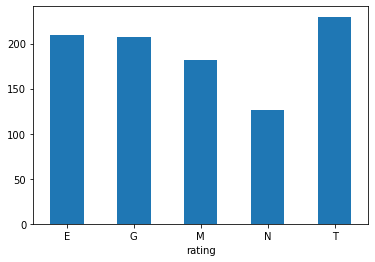

In [5]:
rating_per_avg_stat["kudos"].plot.bar(rot=0)

<AxesSubplot:xlabel='rating'>

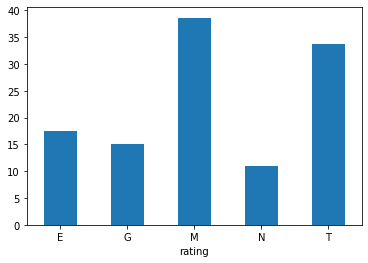

In [6]:
rating_per_avg_stat["comments"].plot.bar(rot=0)


<AxesSubplot:xlabel='rating'>

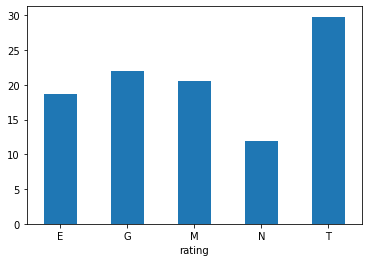

In [7]:
rating_per_avg_stat["bookmarks"].plot.bar(rot=0)


<AxesSubplot:xlabel='rating'>

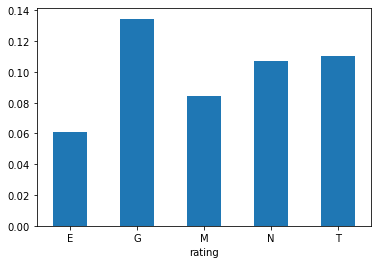

In [8]:
rating_per_avg_stat["kudos_per_hits"].plot.bar(rot=0)

<AxesSubplot:xlabel='rating'>

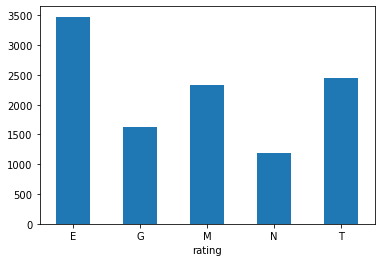

In [9]:
rating_per_avg_stat["hits"].plot.bar(rot=0)


In [10]:
# do wips do worse than completed fics?
iswip_per_avg_stat = df[["isWip"] + numeric_stats].groupby("isWip").mean()
iswip_per_avg_stat

,words,kudos,hits,comments,bookmarks,kudos_per_hits
isWip,,,,,,
False,4285.505778,215.482325,2125.839395,18.790619,23.720258,0.115524
True,18084.324576,165.325424,2464.466102,43.967797,20.943220,0.085314


In [11]:
#oneshots only
oneshot_avg_stats = df[df["intendedChapters"] == "1"]
oneshot_avg_stats.describe()

,words,currentChapters,kudos,hits,comments,bookmarks,collections,kudos_per_hits,numSeries
count,5176.000000,5176.0,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000
mean,2596.845247,1.0,186.205951,1705.160162,11.021638,18.465611,0.075348,0.119047,0.225077
std,2671.258970,0.0,291.995072,2486.148905,15.056836,45.984084,0.277537,0.052576,0.428633
min,100.000000,1.0,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,984.750000,1.0,49.000000,470.750000,3.000000,3.000000,0.000000,0.081063,0.000000
50%,1730.000000,1.0,108.000000,998.000000,7.000000,7.000000,0.000000,0.117149,0.000000
75%,3228.250000,1.0,215.000000,2005.000000,14.000000,18.000000,0.000000,0.152174,0.000000
max,29089.000000,1.0,6424.000000,55854.000000,365.000000,1609.000000,4.000000,0.475000,2.000000


In [12]:
#multichap fics only
multichap_avg_stats = df[df["intendedChapters"] != "1"] # could be a number or a '?'
multichap_avg_stats.describe()

,words,currentChapters,kudos,hits,comments,bookmarks,collections,kudos_per_hits,numSeries
count,1.888000e+03,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,1.753927e+04,5.408369,264.396186,3490.783898,55.825212,36.390360,0.061441,0.086983,0.164195
std,1.306717e+05,24.910631,588.496031,10948.357369,192.528139,112.939069,0.352802,0.036755,0.377634
min,1.220000e+02,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.929000e+03,2.000000,43.000000,564.750000,6.000000,3.000000,0.000000,0.060939,0.000000
50%,6.615500e+03,3.000000,111.500000,1327.500000,18.000000,11.000000,0.000000,0.082634,0.000000
75%,1.578325e+04,6.000000,268.000000,3181.500000,44.000000,29.000000,0.000000,0.109186,0.000000
max,5.440995e+06,1056.000000,12500.000000,386291.000000,5886.000000,2703.000000,8.000000,0.290698,2.000000


In [13]:
#do fics in series have more engagement?
df[df["isSeries"]].describe()

,words,currentChapters,kudos,hits,comments,bookmarks,collections,kudos_per_hits,numSeries
count,1.446000e+03,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,1.056549e+04,2.746196,221.281466,2460.753112,30.145920,20.919779,0.064315,0.104840,1.020055
std,1.479469e+05,28.005114,343.152826,4500.096121,177.881836,56.163853,0.274673,0.041388,0.140238
min,1.000000e+02,1.000000,2.000000,25.000000,0.000000,0.000000,0.000000,0.005296,1.000000
25%,1.063000e+03,1.000000,66.000000,634.500000,4.000000,3.000000,0.000000,0.077239,1.000000
50%,2.094500e+03,1.000000,127.500000,1333.000000,9.500000,8.000000,0.000000,0.102331,1.000000
75%,4.907500e+03,1.000000,243.000000,2672.500000,19.000000,19.000000,0.000000,0.129826,1.000000
max,5.440995e+06,1056.000000,4828.000000,65995.000000,5886.000000,1203.000000,4.000000,0.303704,2.000000


In [35]:
# let's get the bar graph of all relationships in the tag and see if we need to fix some tags
from itertools import chain
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]


rel_only = df[df['relationships'].str.len() > 0]
print(((rel_only['relationships'].size / df.relationships.size) *100),'% of MP100 fics contain relationship tags')

87.37259343148358 % of MP100 fics contain relationship tags


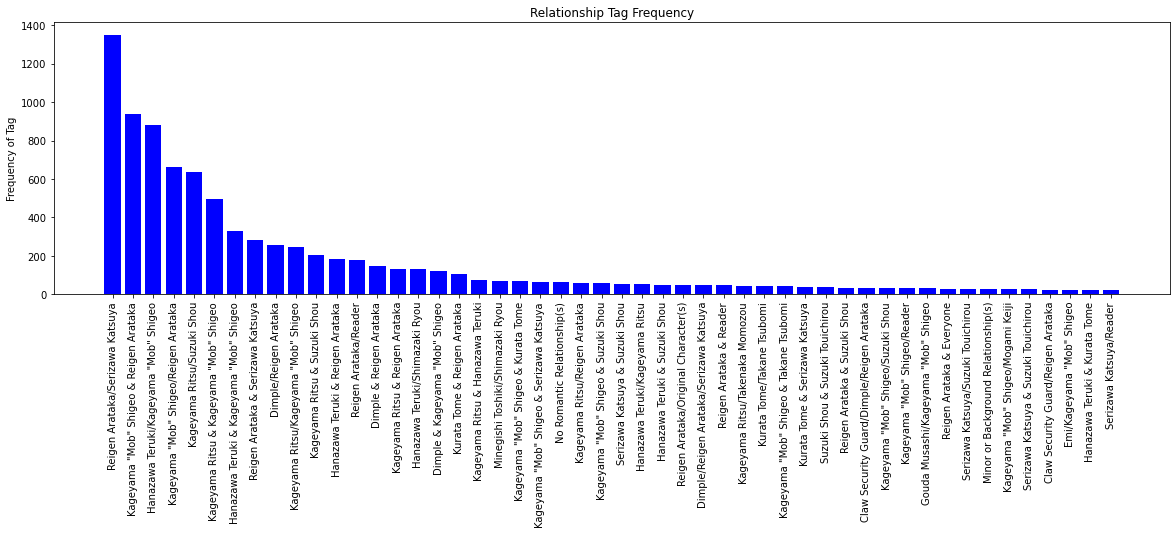

In [36]:
ls_rel = rel_only.relationships.tolist()
ctr = Counter(chain.from_iterable(ls_rel))
ctr.most_common(50)

y = [count for tag, count in ctr.most_common(50)]
x = [tag for tag, count in ctr.most_common(50)]

plt.bar(x, y, color='blue')
plt.title("Relationship Tag Frequency")
plt.ylabel("Frequency of Tag")
plt.xticks(rotation=90)
plt.show()

In [44]:
ctr.most_common()[-100:-1]

[('Hanazawa Teruki & Takenaka', 1),
 ('shou/ritsu', 1),
 ('shouritsu - Relationship', 1),
 ('shouxritsu', 1),
 ('Hanazawa Teruki/Takenaka', 1),
 ('very eventual Kageyama Shigeo/Takane Tsubomi', 1),
 ('Kageyama Ritsu/Suzuki Shou/Suzuki Touichirou', 1),
 ('Kurata Tome & Takenaka', 1),
 ('terumob if u squint', 1),
 ('Hanazawa Teruki/Clones', 1),
 ('Reigen Arataka noncons female Kageyama "Mob" Shigeo', 1),
 ('Minegishi & Shimazaki (Mob Psycho 100)', 1),
 ('kageyama "Mob" Shigeo & Emi', 1),
 ('Kageyama "Mob" Shigeo/Emi', 1),
 ('takemob is only mentioned', 1),
 ('Hanazawa Teruki/Minegishi/Shimazaki', 1),
 ('Hanazawa Teruki/Kageyama "Mob" Shigeo/Takenaka (Mob Psycho 100)', 1),
 ('Suzuki Touichirou/Serizawa Katsuya', 1),
 ('Kurata Tome & Hanazawa Teruki', 1),
 ('Kurata Tome & Telepathy Club', 1),
 ('Takane Tsubomi/Asagiri Minori', 1),
 ('Shigeo "Mob" Kageyama/Takenaka', 1),
 ('Takenaka/Shigeo "Mob" Kageyama', 1),
 ('Hanazawa Teruki/Asahi Gou', 1),
 ('Ishiguro/Suzuki Touichirou', 1),
 ('Kageyam

In [57]:
# poly relationships frequency counter
d = dict(ctr)
d = {key: d[key] for key in d.keys() if key.count('/') > 1}
sorted(d.items(), key=lambda x:x[1], reverse=True)

[('Dimple/Reigen Arataka/Serizawa Katsuya', 48),
 ('Claw Security Guard/Dimple/Reigen Arataka', 33),
 ('Kageyama Ritsu/Kageyama "Mob" Shigeo/Reigen Arataka', 11),
 ('Claw Security Guard/Dimple/Reigen Arataka/Serizawa Katsuya', 9),
 ('Kageyama Ritsu/Suzuki Shou/Takenaka Momozou', 4),
 ('Hanazawa Teruki/Kageyama Ritsu/Kageyama "Mob" Shigeo/Suzuki Shou', 3),
 ('Dimple/Kageyama "Mob" Shigeo/Reigen Arataka', 2),
 ('Kageyama "Mob" Shigeo/Reigen Arataka/Serizawa Katsuya', 2),
 ('Dimple (Mob Psycho 100)/Kageyama "Mob" Shigeo/Reigen Arataka', 2),
 ('Hanazawa Teruki/Kageyama "Mob" Shigeo/Takane Tsubomi', 2),
 ('Hanazawa Teruki/Kageyama "Mob" Shigeo/Takenaka Momozou', 2),
 ('Hanazawa Teruki/Kageyama "Mob" Shigeo/Takenaka', 2),
 ('Kageyama "Mob" Shigeo/Reigen Arataka/Kageyama Ritsu', 2),
 ('Reigen Arataka/Serizawa Katsuya/Reader', 1),
 ('past/one sided Ishiguro/Mob', 1),
 ('Dimple/Kageyama Ritsu/Kageyama "Mob" Shigeo/Reigen Arataka (MP100)', 1),
 ('Kageyama Ritsu/Hanazawa Teruki/Suzuki Shou', 1),


In [15]:
# platonic relationships only
rel_no_slash = rel_only[rel_only['isSlash'] == False]
rel_no_slash


,title,author,isAnon,isOrphan,id,rating,warnings,category,isWip,lastUpdated,...,words,currentChapters,intendedChapters,kudos,hits,comments,bookmarks,collections,kudos_per_hits,numSeries
4,New Business Venture,blue_avocado,False,False,/works/18739756,T,[No Archive Warnings Apply],[Gen],True,2023-05-17,...,44304,9,?,23,320,10,2,0,0.071875,0
6,"""But Who Will Scare The Crows Away?""",Bandtrees,False,False,/works/45779269,M,[Graphic Depictions Of Violence],[Gen],True,2023-05-16,...,64812,3,5,24,683,37,8,0,0.035139,0
17,Sexual harassment is a (NOT) fun way to spend ...,Night_watcheer,False,False,/works/47203672,G,[No Archive Warnings Apply],[Gen],False,2023-05-15,...,1399,1,1,5,71,2,1,0,0.070423,0
19,giving you something to lean on,thatwasanticlimactic,False,False,/works/47147260,G,[No Archive Warnings Apply],[Gen],False,2023-05-15,...,7241,1,1,22,183,2,5,0,0.120219,1
25,Caveat Emptor (End Racism in the OTW),KarideCedria,False,False,/works/47044465,T,[No Archive Warnings Apply],"[Gen, M/M]",True,2023-05-14,...,3915,5,6,43,357,25,9,0,0.120448,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,Gooze,orphan_account,False,True,/works/7717465,G,[No Archive Warnings Apply],[Gen],False,2016-08-09,...,4830,1,1,628,7383,12,64,0,0.085060,0
7034,Contentment,wuwu,False,False,/works/7719790,T,[No Archive Warnings Apply],[Gen],False,2016-08-09,...,8279,1,1,2113,19026,135,230,1,0.111059,1
7040,It Doesn't Get Better All At Once,shelliana,False,False,/works/7132652,T,[Choose Not To Use Archive Warnings],"[Gen, M/M]",True,2016-07-25,...,3901,3,?,327,3085,33,25,0,0.105997,0
7041,Green,Sifl,False,False,/works/7564429,T,[No Archive Warnings Apply],[Gen],False,2016-07-23,...,1696,1,1,449,4995,32,45,0,0.089890,1
